In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
from IPython import display
import matplotlib.cm as cm
import pylab as pl

# Assignment 3

## Name: Chanpreet Singh (1576137)

# Data Exploration

this assignment is to clustering the values of the live saling data by applying unsupervised models
*   remove redundant information
*   dealing with categorical data
*   dealing with missing data

In [68]:
# Facebook Live Selling Data

data = pd.read_csv('data1.csv')
data.head()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

## Data Analysis 

### Missing Data (see Assignement 2)

In [69]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [70]:
data = data.drop(["status_id", "status_published","Column1","Column2","Column3","Column4"], axis=1)

data

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


### Categorical Data (see Assignement 2)

In [71]:

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['status_type'] = label_encoder.fit_transform(data['status_type'])

data

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0
7046,1,16,0,0,14,1,0,1,0,0
7047,1,2,0,0,1,1,0,0,0,0
7048,1,351,12,22,349,2,0,0,0,0


### Statistical Summary

In [72]:
data.describe()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,1.704965,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,0.942399,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int64
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int64(10)
memory usage: 550.9 KB


## Scaling/Normalization

In [74]:
from sklearn.preprocessing import StandardScaler

data = StandardScaler().fit_transform(data)

data

array([[ 1.37428794,  0.64610394,  0.32335035, ...,  0.07671305,
         0.47357035, -0.15574803],
       [-0.74810636, -0.17319166, -0.25220622, ..., -0.17600986,
        -0.152587  , -0.15574803],
       [ 1.37428794, -0.00673846,  0.01308938, ...,  0.07671305,
        -0.152587  , -0.15574803],
       ...,
       [-0.74810636, -0.49312768, -0.25220622, ..., -0.17600986,
        -0.152587  , -0.15574803],
       [-0.74810636,  0.26131603, -0.23871662, ..., -0.17600986,
        -0.152587  , -0.15574803],
       [-0.74810636, -0.46070173, -0.25220622, ..., -0.17600986,
        -0.152587  , -0.15574803]])

# K-means clustering



1.   what is K-means clustering?

K-mean is a clustering algorithm in which the datapoints keep regrouping and moving centroids continuously to reach a stale state. The algorithm start with some random cluster centroids (centroids expected to be same as expected clusters), then datapoints closer to centroid get clustered under centroids group and centroid move to average location of data points in the centroid group. 



2.   explain the procedure of k-means clustering

We start by choosing the number of clusters, then we place clusters at a random location, and start clustering datapoints closer to centroid into the centroids group and also at same time move centroid to average location of datapoints in the centroid group. In this manner our centroids keep moving to the center of datapoints and form clusters with centroids at center of each cluster. 



In [75]:
# procedure for plotting clusters

def plot_clusters(data, clusters, centroids, title):
  pl.gcf().clear()
  
  # Plotting Data Points
  if clusters is None:
    pl.scatter(data[:,0], data[:,1], s=10, c='steelblue')
    pl.scatter(centroids[:,0], centroids[:,1], marker='*', c='r', s=150)
  else:
    # Different color clusters
    k = len(centroids)
    for i in range(k):
      colors = cm.rainbow(np.linspace(0, 1, 3))
      cluster_data = data[clusters == i, :]
      pl.scatter(cluster_data[:,0], cluster_data[:,1], s=10, color=colors[i])
      pl.scatter(centroids[i,0], centroids[i,1], marker='*', color='k', s=200)
      
  pl.title(title)
  display.display(pl.gcf())
  display.clear_output(wait=True)

## Clustering (scikit-learn can be used)

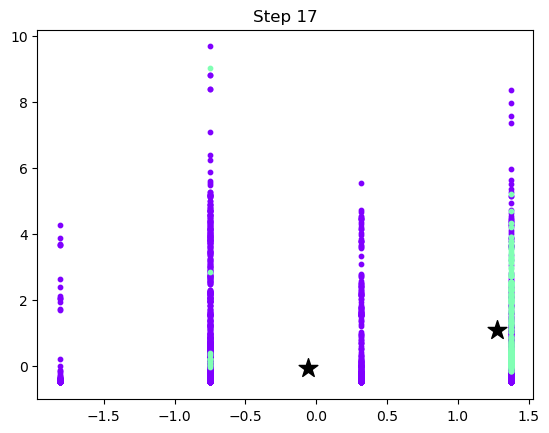

In [76]:
from sklearn.cluster import KMeans

k=2

kmeans = KMeans(k, random_state=0).fit(data) # Running K-Mean algorithm

clusters = kmeans.labels_ # Getting cluster labels
centroids = kmeans.cluster_centers_ # Predicted centroids
steps = kmeans.n_iter_ # Steps till convergence
plot_clusters(data, clusters, centroids, 'Step ' + str(steps))

## Elbow Method (determining of k)



1.   what is the eblbow method?


It is a method that help us in finding the appropriate number of clusters (k) rather than random guess. We plot a cost function with respect to number of clusters and then select the point with maximum bend known as elbow point. 




*   Explain the results


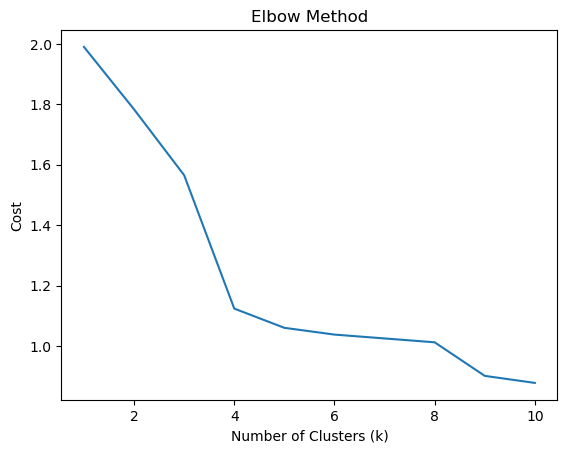

In [77]:
from sklearn.cluster import KMeans

k = 2
costs = []
max_k = 10
range_of_k = range(1, max_k+1)

for k in range_of_k:
  n = data.shape[0]
  
  kmeans = KMeans(k, random_state=0).fit(data) # Running K-Mean algorithm

  clusters = kmeans.labels_ # Getting cluster labels
  centroids = kmeans.cluster_centers_ # Predicted centroids
  steps = kmeans.n_iter_ # Steps till convergence

  distances = np.zeros((n, k))
  for i in range(k):
      distances[:, i] = np.linalg.norm(data - centroids[i, :], axis=1)
  # Cost: Normalized Sum of Distances to Closest Centroid
  cost = np.sum(np.min(distances, axis=1))/n
  costs.append(cost)

plt.plot(range_of_k, costs)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')  
plt.show()

# PCA using scikit-learn

Using the example from Unsupervised Learning - part 2 (iris data), please perform PCA analysis.

After that, cluster the data of reduced dimensionality and plot clusters.

In [98]:
!pip install plotly

In [99]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
  '''))
  init_notebook_mode(connected=False)

In [100]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


In [106]:
import pandas as pd

# Reading remotely-located CSV file into dataframe
df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

# Setting titles of each column. Indices are set automatically. Can be turned off.
df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

# This gets the first rows of dataframe
df.head()

X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [107]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [108]:
# enable_plotly_in_cell()

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

colors = {'Iris-setosa': '#0D76BF', 
          'Iris-versicolor': '#00cc96', 
          'Iris-virginica': '#EF553B'}


data = []

for name, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), colors.values()):

    trace = dict(
        type='scatter',
        x=Y_sklearn[y==name,0],
        y=Y_sklearn[y==name,1],
        mode='markers',
        name=name,
        marker=dict(
            color=col,
            size=12,
            line=dict(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8)
    )
    data.append(trace)

layout = dict(
        xaxis=dict(title='PC1', showline=False),
        yaxis=dict(title='PC2', showline=False)
)
fig = dict(data=data, layout=layout)
iplot(fig, filename='pca-scikitlearn')